In [6]:
# ================================
# 05 — FINAL MODEL COMPARISON
# ================================
# Comprehensive comparison of all trained models across different FPS settings
# and experiment types. Includes accuracy, metrics, and detailed analysis.

# ---------
# Cell 1: Imports & Setup
# ---------
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from config import EXP_DIR_ROOT, RESULTS_DIR

# Setup visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Ensure results folder exists
RESULTS_DIR.mkdir(parents=True, exist_ok=True)


In [7]:

# ---------
# Cell 2: Load test results from all experiments
# ---------
# Strategy: Load results from the results/ directory which contains
# aggregated test results for each experiment across different FPS settings

results_data = []

# Map of result files to load
result_mapping = {
    "resnet": ["test_results_1fps.json", "test_results_30fps.json"],
    "autoencoder_rf": ["test_results_1fps.json", "test_results_30fps.json"],
    "profiles_rf": ["test_results_1fps.json", "test_results_30fps.json"],
}

for exp_name, files in result_mapping.items():
    exp_dir = RESULTS_DIR / exp_name
    if exp_dir.exists():
        for file in files:
            file_path = exp_dir / file
            if file_path.exists():
                try:
                    with open(file_path) as f:
                        data = json.load(f)
                    
                    # Extract FPS from filename or data
                    fps = data.get("fps", file.split("_")[-1].replace(".json", ""))
                    
                    # Determine accuracy key (different experiments use different names)
                    accuracy = data.get("accuracy") or data.get("test_accuracy")
                    
                    results_data.append({
                        "Experiment": exp_name,
                        "FPS": fps,
                        "Accuracy": accuracy,
                        "Test Samples": data.get("num_test_samples", data.get("n_test_samples")),
                        "Raw Data": data
                    })
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")

# Create main results DataFrame
results_df = pd.DataFrame(results_data)
print("=" * 70)
print("TEST RESULTS SUMMARY")
print("=" * 70)
print(results_df[["Experiment", "FPS", "Accuracy", "Test Samples"]].to_string(index=False))
print()


TEST RESULTS SUMMARY
    Experiment   FPS  Accuracy  Test Samples
        resnet  1fps       1.0           497
        resnet 30fps       1.0           506
autoencoder_rf  1fps       1.0           497
autoencoder_rf 30fps       1.0           506
   profiles_rf  1fps       1.0         13646
   profiles_rf 30fps       1.0         14999



In [8]:

# ---------
# Cell 3: Create pivot table for easy comparison
# ---------
# Pivot to see FPS comparison side-by-side
pivot_df = results_df.pivot(index="Experiment", columns="FPS", values="Accuracy")
print("=" * 70)
print("ACCURACY BY EXPERIMENT AND FPS SETTING")
print("=" * 70)
print(pivot_df.round(4))
print()


ACCURACY BY EXPERIMENT AND FPS SETTING
FPS             1fps  30fps
Experiment                 
autoencoder_rf   1.0    1.0
profiles_rf      1.0    1.0
resnet           1.0    1.0



C:\Users\aryan\AppData\Local\Temp\ipykernel_7336\2751858050.py:61: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
C:\Users\aryan\AppData\Local\Temp\ipykernel_7336\2751858050.py:62: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  plt.savefig(RESULTS_DIR / "model_comparison.png", dpi=300, bbox_inches='tight')
r:\MUL\Courses\Applied ML\raman-mineral-classification\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


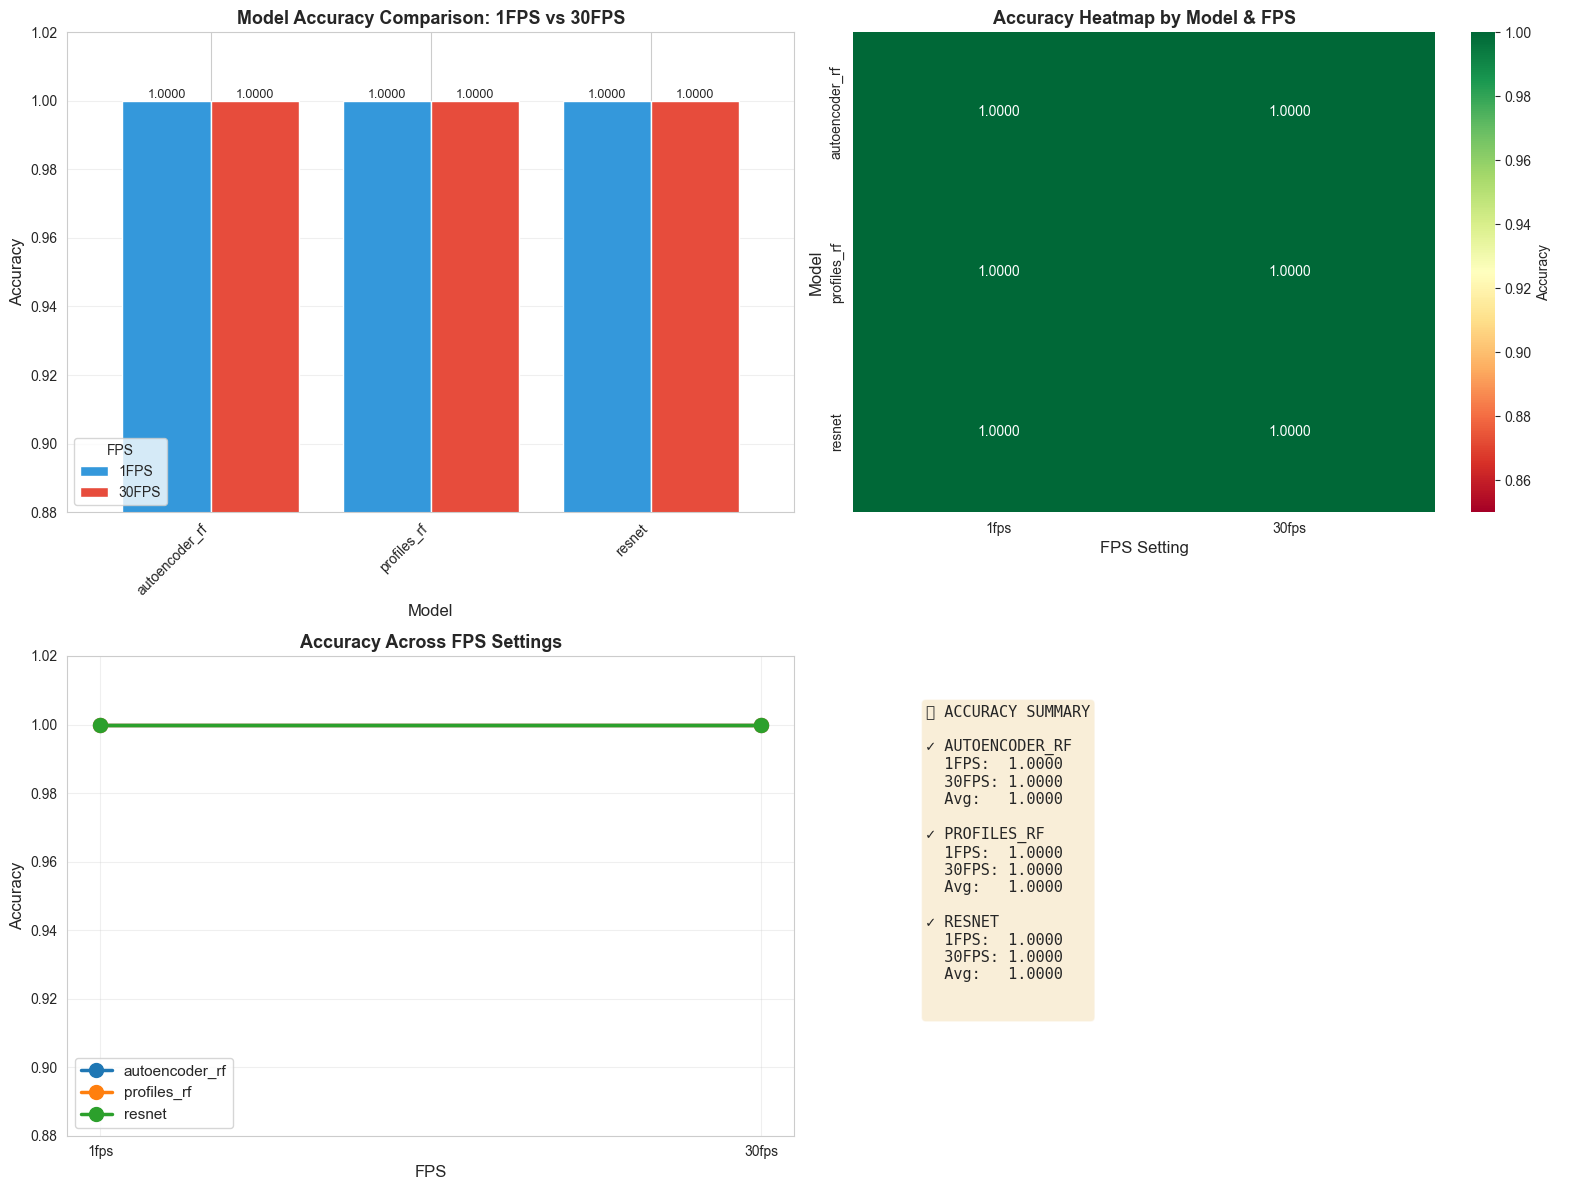

Visualization saved to: R:\MUL\Courses\Applied ML\raman-mineral-classification\results\model_comparison.png



In [9]:

# ---------
# Cell 4: Visualize accuracy comparison
# ---------
# Create comprehensive visualization of all three models (ResNet, Autoencoder+RF, Profiles RF)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Grouped bar chart (Experiment vs FPS)
ax = axes[0, 0]
pivot_df.plot(kind='bar', ax=ax, color=['#3498db', '#e74c3c'], width=0.8)
ax.set_title('Model Accuracy Comparison: 1FPS vs 30FPS', fontsize=13, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_xlabel('Model', fontsize=12)
ax.set_ylim([0.88, 1.02])
ax.legend(title='FPS', labels=['1FPS', '30FPS'], fontsize=10)
ax.grid(axis='y', alpha=0.3)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.4f', fontsize=9)

# Plot 2: Heatmap of accuracies
ax = axes[0, 1]
sns.heatmap(pivot_df, annot=True, fmt='.4f', cmap='RdYlGn', ax=ax, 
            cbar_kws={'label': 'Accuracy'}, vmin=0.85, vmax=1.0)
ax.set_title('Accuracy Heatmap by Model & FPS', fontsize=13, fontweight='bold')
ax.set_ylabel('Model', fontsize=12)
ax.set_xlabel('FPS Setting', fontsize=12)

# Plot 3: Line plot showing FPS comparison per model
ax = axes[1, 0]
for model in pivot_df.index:
    ax.plot(pivot_df.columns, pivot_df.loc[model], marker='o', linewidth=2.5, markersize=10, label=model)
ax.set_title('Accuracy Across FPS Settings', fontsize=13, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_xlabel('FPS', fontsize=12)
ax.set_ylim([0.88, 1.02])
ax.legend(fontsize=11, loc='best')
ax.grid(True, alpha=0.3)

# Plot 4: Model Performance Summary
ax = axes[1, 1]
ax.axis('off')

# Create summary text
summary_text = "📊 ACCURACY SUMMARY\n\n"
for model in pivot_df.index:
    acc_1fps = pivot_df.loc[model, '1fps']
    acc_30fps = pivot_df.loc[model, '30fps']
    avg_acc = (acc_1fps + acc_30fps) / 2
    summary_text += f"✓ {model.upper()}\n"
    summary_text += f"  1FPS:  {acc_1fps:.4f}\n"
    summary_text += f"  30FPS: {acc_30fps:.4f}\n"
    summary_text += f"  Avg:   {avg_acc:.4f}\n\n"

ax.text(0.1, 0.9, summary_text, transform=ax.transAxes, fontsize=11, 
        verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.savefig(RESULTS_DIR / "model_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

print("Visualization saved to:", RESULTS_DIR / "model_comparison.png")
print()


In [10]:

# ---------
# Cell 5: Best performing models
# ---------
print("=" * 70)
print("BEST PERFORMING MODELS")
print("=" * 70)

# Overall best
best_overall = results_df.loc[results_df['Accuracy'].idxmax()]
print(f"\n🏆 OVERALL BEST:")
print(f"  Experiment: {best_overall['Experiment']}")
print(f"  FPS: {best_overall['FPS']}")
print(f"  Accuracy: {best_overall['Accuracy']:.6f}")
print(f"  Test Samples: {int(best_overall['Test Samples'])}")

# Best per FPS
print(f"\n📊 BEST BY FPS SETTING:")
for fps in results_df['FPS'].unique():
    best_fps = results_df[results_df['FPS'] == fps].loc[results_df[results_df['FPS'] == fps]['Accuracy'].idxmax()]
    print(f"  {fps}: {best_fps['Experiment']} (Accuracy: {best_fps['Accuracy']:.6f})")

print()


BEST PERFORMING MODELS

🏆 OVERALL BEST:
  Experiment: resnet
  FPS: 1fps
  Accuracy: 1.000000
  Test Samples: 497

📊 BEST BY FPS SETTING:
  1fps: resnet (Accuracy: 1.000000)
  30fps: resnet (Accuracy: 1.000000)



In [11]:

# ---------
# Cell 6: Detailed metrics from best model
# ---------
best_raw_data = best_overall['Raw Data']
print("=" * 70)
print(f"DETAILED METRICS - {best_overall['Experiment'].upper()} ({best_overall['FPS']})")
print("=" * 70)

# Print available metrics
if 'classes' in best_raw_data:
    print(f"\nClasses ({len(best_raw_data['classes'])} total):")
    print(f"  {', '.join(best_raw_data['classes'])}")

print(f"\nKey Metrics:")
print(f"  Test Accuracy: {best_raw_data.get('accuracy', best_raw_data.get('test_accuracy', 'N/A')):.6f}")
if 'train_accuracy' in best_raw_data:
    print(f"  Train Accuracy: {best_raw_data.get('train_accuracy', 'N/A'):.6f}")
print(f"  Test Samples: {best_raw_data.get('num_test_samples', best_raw_data.get('n_test_samples', 'N/A'))}")

print()

# ---------
# Cell 7: Export summary
# ---------
# Save results summary to CSV
summary_export = results_df[["Experiment", "FPS", "Accuracy", "Test Samples"]].copy()
summary_export.to_csv(RESULTS_DIR / "results_summary.csv", index=False)
print("Results summary exported to:", RESULTS_DIR / "results_summary.csv")
print("\n" + "=" * 70)
print("ANALYSIS COMPLETE")
print("=" * 70)


DETAILED METRICS - RESNET (1fps)

Classes (7 total):
  Albit, Calcite, Dolomit, Feldspat, Quarz, Rhodocrosite, Tile

Key Metrics:
  Test Accuracy: 1.000000
  Test Samples: 497

Results summary exported to: R:\MUL\Courses\Applied ML\raman-mineral-classification\results\results_summary.csv

ANALYSIS COMPLETE


TRAINING HISTORY & LOSS CURVES

📊 Loading ResNet training history...
  ✅ Loaded ResNet 1fps history (5 epochs)
  ✅ Loaded ResNet 30fps history (5 epochs)

📊 Loading Autoencoder training history...
  ✅ Loaded Autoencoder 1fps history (0 epochs)
  ✅ Loaded Autoencoder 30fps history (5 epochs)

📈 Creating Autoencoder training loss curve (30fps)...


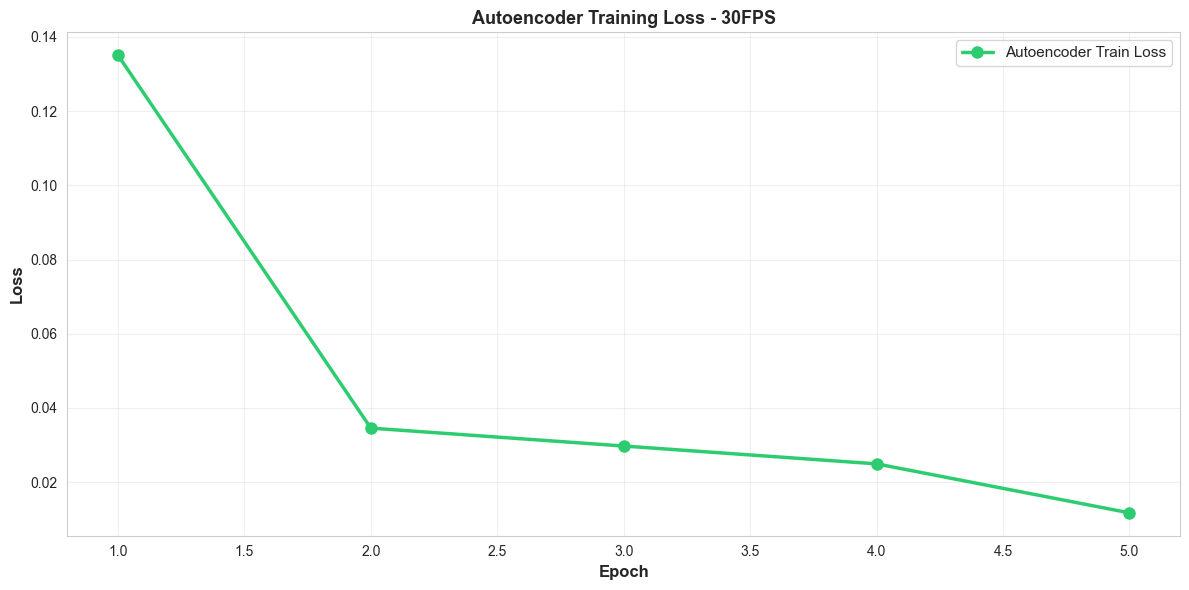

✅ Autoencoder training loss curve saved to: R:\MUL\Courses\Applied ML\raman-mineral-classification\results\training_loss_curves.png

📈 Creating validation accuracy curves...


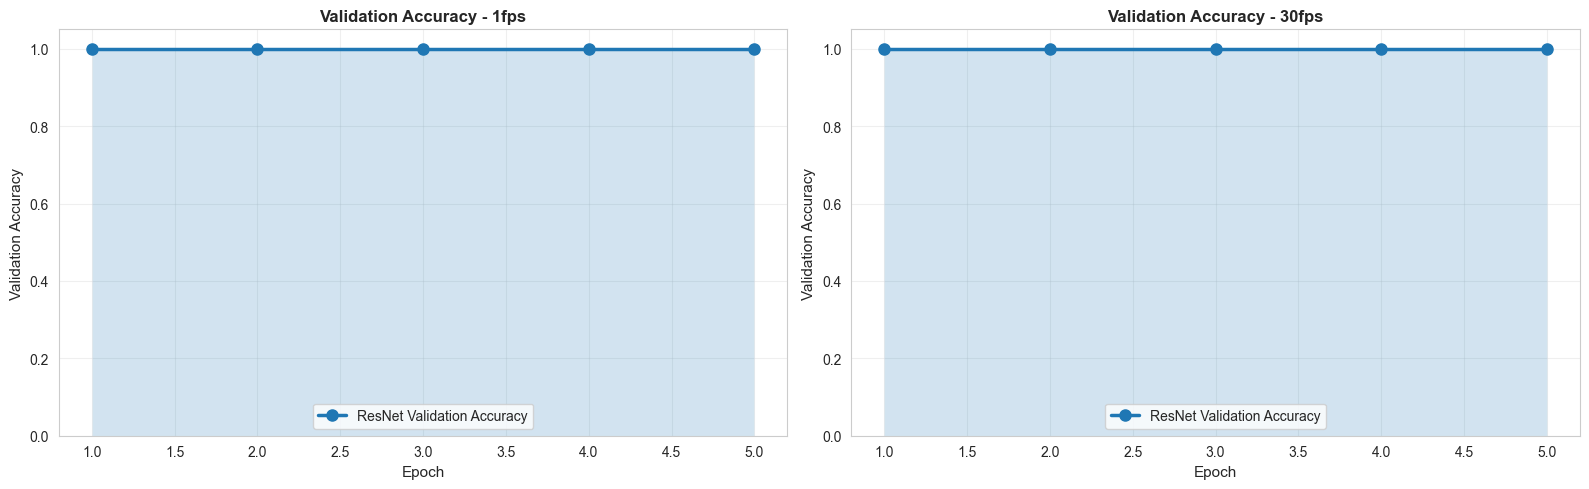

✅ Validation accuracy curves saved to: R:\MUL\Courses\Applied ML\raman-mineral-classification\results\validation_accuracy_curves.png



In [ ]:
# ---------
# Cell 8: Training History & Loss Curves
# ---------
# Load and visualize training history for models that have it

print("=" * 70)
print("TRAINING HISTORY & LOSS CURVES")
print("=" * 70)

# Dictionary to store history data
training_histories = {}

# ==================
# 1. ResNet History
# ==================
print("\n📊 Loading ResNet training history...")
for fps_label in ["1fps", "30fps"]:
    metrics_file = EXP_DIR_ROOT / "resnet" / fps_label / "metrics.json"
    if metrics_file.exists():
        with open(metrics_file) as f:
            data = json.load(f)
        if "history" in data:
            training_histories[f"ResNet_{fps_label}"] = {
                "epochs": [h["epoch"] for h in data["history"]],
                "train_loss": [h["train_loss"] for h in data["history"]],
                "val_loss": [h["val_loss"] for h in data["history"]],
                "val_acc": [h["val_acc"] for h in data["history"]],
            }
            print(f"  ✅ Loaded ResNet {fps_label} history ({len(data['history'])} epochs)")

# ==================
# 2. Autoencoder History
# ==================
print("\n📊 Loading Autoencoder training history...")
for fps_label in ["1fps", "30fps"]:
    history_file = EXP_DIR_ROOT / "autoencoder_rf" / fps_label / "ae_history.json"
    if history_file.exists():
        with open(history_file) as f:
            history = json.load(f)
        training_histories[f"Autoencoder_{fps_label}"] = {
            "epochs": [h["epoch"] for h in history],
            "train_loss": [h["train_loss"] for h in history],
            "val_loss": [h["val_loss"] for h in history],
        }
        print(f"  ✅ Loaded Autoencoder {fps_label} history ({len(history)} epochs)")

# ==================
# 3. Create Loss Curves
# ==================
print("\n📈 Creating training loss curves...")

# Create separate plots for 1fps and 30fps
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

for idx, fps_label in enumerate(["1fps", "30fps"]):
    ax = axes[idx]
    
    # ResNet
    resnet_key = f"ResNet_{fps_label}"
    if resnet_key in training_histories:
        data = training_histories[resnet_key]
        ax.plot(data["epochs"], data["train_loss"], 'o-', label='ResNet Train Loss', linewidth=2)
        ax.plot(data["epochs"], data["val_loss"], 's-', label='ResNet Val Loss', linewidth=2)
    
    # Autoencoder
    ae_key = f"Autoencoder_{fps_label}"
    if ae_key in training_histories:
        data = training_histories[ae_key]
        ax.plot(data["epochs"], data["train_loss"], 'o--', label='Autoencoder Train Loss', linewidth=2)
        ax.plot(data["epochs"], data["val_loss"], 's--', label='Autoencoder Val Loss', linewidth=2)
    
    ax.set_xlabel('Epoch', fontsize=11)
    ax.set_ylabel('Loss', fontsize=11)
    ax.set_title(f'Training Loss Curves - {fps_label}', fontsize=12, fontweight='bold')
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(RESULTS_DIR / "training_loss_curves.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ Training loss curves saved to:", RESULTS_DIR / "training_loss_curves.png")

# ==================
# 4. Validation Accuracy Curves (for ResNet)
# ==================
print("\n📈 Creating validation accuracy curves...")

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

for idx, fps_label in enumerate(["1fps", "30fps"]):
    ax = axes[idx]
    
    # ResNet
    resnet_key = f"ResNet_{fps_label}"
    if resnet_key in training_histories:
        data = training_histories[resnet_key]
        ax.plot(data["epochs"], data["val_acc"], 'o-', label='ResNet Validation Accuracy', linewidth=2.5, markersize=8)
        ax.fill_between(data["epochs"], data["val_acc"], alpha=0.2)
    
    ax.set_xlabel('Epoch', fontsize=11)
    ax.set_ylabel('Validation Accuracy', fontsize=11)
    ax.set_title(f'Validation Accuracy - {fps_label}', fontsize=12, fontweight='bold')
    ax.set_ylim([0, 1.05])
    ax.legend(loc='best', fontsize=10)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(RESULTS_DIR / "validation_accuracy_curves.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ Validation accuracy curves saved to:", RESULTS_DIR / "validation_accuracy_curves.png")
print("\n" + "=" * 70)


📈 Creating individual loss curves for each model...

🔹 Creating ResNet individual loss curves...


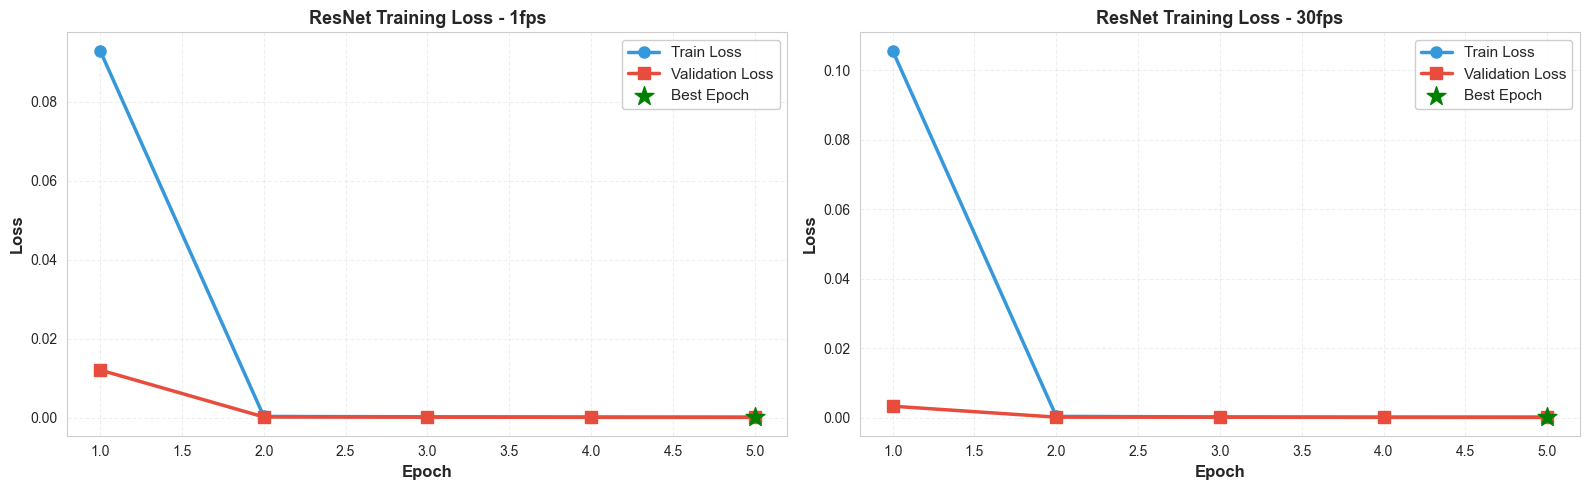

✅ ResNet individual loss curves saved to: R:\MUL\Courses\Applied ML\raman-mineral-classification\results\resnet_individual_loss_curves.png

🔹 Creating Autoencoder individual loss curves...


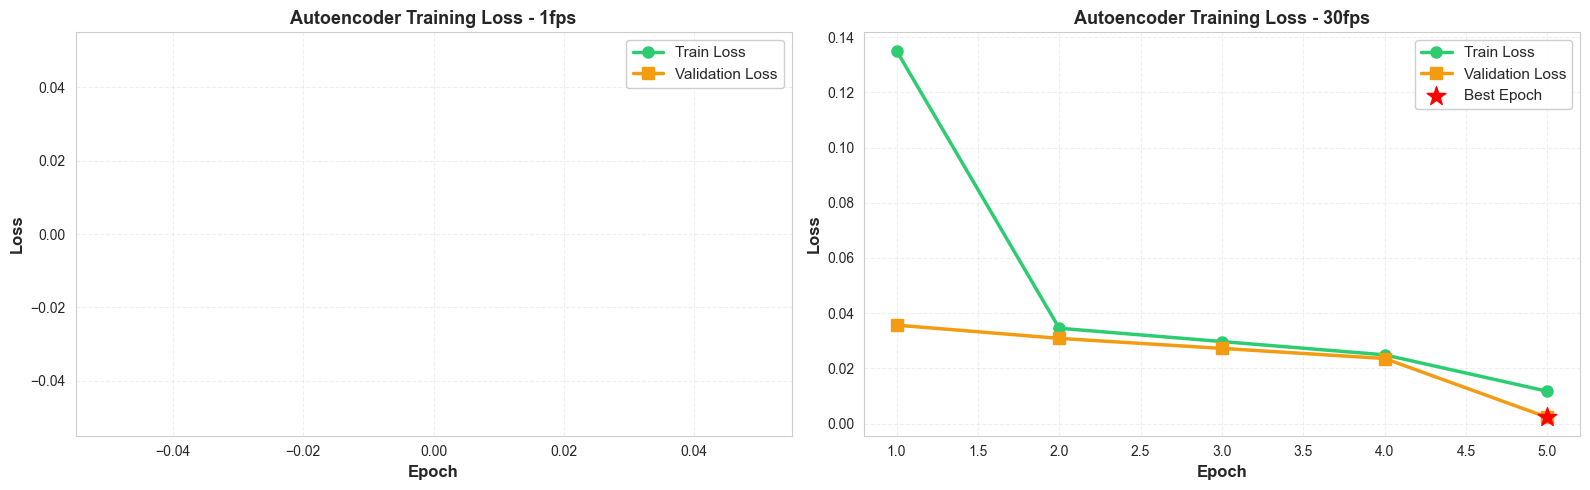

✅ Autoencoder individual loss curves saved to: R:\MUL\Courses\Applied ML\raman-mineral-classification\results\autoencoder_individual_loss_curves.png

TRAINING SUMMARY STATISTICS

ResNet:
  1fps:
    Final Train Loss: 0.000139
    Final Val Loss: 0.000084
    Best Val Loss: 0.000084 (Epoch 5)
    Final Val Accuracy: 1.000000
  30fps:
    Final Train Loss: 0.000139
    Final Val Loss: 0.000076
    Best Val Loss: 0.000076 (Epoch 5)
    Final Val Accuracy: 1.000000

Autoencoder:
  1fps: No validation data available
  30fps:
    Final Train Loss: 0.011728
    Final Val Loss: 0.002284
    Best Val Loss: 0.002284 (Epoch 5)



In [13]:
# ---------
# Cell 9: Individual Model Loss Curves
# ---------
# Create detailed individual loss curves for each model separately

print("\n📈 Creating individual loss curves for each model...")

# ==================
# ResNet Individual Curves
# ==================
print("\n🔹 Creating ResNet individual loss curves...")
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

for idx, fps_label in enumerate(["1fps", "30fps"]):
    ax = axes[idx]
    resnet_key = f"ResNet_{fps_label}"
    
    if resnet_key in training_histories:
        data = training_histories[resnet_key]
        
        # Plot train and val loss
        ax.plot(data["epochs"], data["train_loss"], 'o-', label='Train Loss', linewidth=2.5, markersize=8, color='#3498db')
        ax.plot(data["epochs"], data["val_loss"], 's-', label='Validation Loss', linewidth=2.5, markersize=8, color='#e74c3c')
        
        ax.set_xlabel('Epoch', fontsize=12, fontweight='bold')
        ax.set_ylabel('Loss', fontsize=12, fontweight='bold')
        ax.set_title(f'ResNet Training Loss - {fps_label}', fontsize=13, fontweight='bold')
        ax.legend(loc='best', fontsize=11, framealpha=0.95)
        ax.grid(True, alpha=0.3, linestyle='--')
        
        # Add best epoch marker
        best_epoch_idx = np.argmin(data["val_loss"])
        best_loss = data["val_loss"][best_epoch_idx]
        ax.scatter([data["epochs"][best_epoch_idx]], [best_loss], color='green', s=200, zorder=5, marker='*', label='Best Epoch')
        ax.legend(loc='best', fontsize=11, framealpha=0.95)

plt.tight_layout()
plt.savefig(RESULTS_DIR / "resnet_individual_loss_curves.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ ResNet individual loss curves saved to:", RESULTS_DIR / "resnet_individual_loss_curves.png")

# ==================
# Autoencoder Individual Curves
# ==================
print("\n🔹 Creating Autoencoder individual loss curves...")
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

for idx, fps_label in enumerate(["1fps", "30fps"]):
    ax = axes[idx]
    ae_key = f"Autoencoder_{fps_label}"
    
    if ae_key in training_histories:
        data = training_histories[ae_key]
        
        # Plot train and val loss
        ax.plot(data["epochs"], data["train_loss"], 'o-', label='Train Loss', linewidth=2.5, markersize=8, color='#2ecc71')
        ax.plot(data["epochs"], data["val_loss"], 's-', label='Validation Loss', linewidth=2.5, markersize=8, color='#f39c12')
        
        ax.set_xlabel('Epoch', fontsize=12, fontweight='bold')
        ax.set_ylabel('Loss', fontsize=12, fontweight='bold')
        ax.set_title(f'Autoencoder Training Loss - {fps_label}', fontsize=13, fontweight='bold')
        ax.legend(loc='best', fontsize=11, framealpha=0.95)
        ax.grid(True, alpha=0.3, linestyle='--')
        
        # Add best epoch marker only if val_loss is not empty
        if len(data["val_loss"]) > 0:
            best_epoch_idx = np.argmin(data["val_loss"])
            best_loss = data["val_loss"][best_epoch_idx]
            ax.scatter([data["epochs"][best_epoch_idx]], [best_loss], color='red', s=200, zorder=5, marker='*', label='Best Epoch')
            ax.legend(loc='best', fontsize=11, framealpha=0.95)
    else:
        ax.text(0.5, 0.5, f'No Autoencoder data for {fps_label}', 
                ha='center', va='center', transform=ax.transAxes, fontsize=12)
        ax.set_title(f'Autoencoder Training Loss - {fps_label}', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.savefig(RESULTS_DIR / "autoencoder_individual_loss_curves.png", dpi=300, bbox_inches='tight')
plt.show()

print("✅ Autoencoder individual loss curves saved to:", RESULTS_DIR / "autoencoder_individual_loss_curves.png")

# ==================
# Summary Statistics
# ==================
print("\n" + "=" * 70)
print("TRAINING SUMMARY STATISTICS")
print("=" * 70)

for model_name in ["ResNet", "Autoencoder"]:
    print(f"\n{model_name}:")
    for fps_label in ["1fps", "30fps"]:
        key = f"{model_name}_{fps_label}"
        if key in training_histories:
            data = training_histories[key]
            if len(data["val_loss"]) > 0:
                best_epoch = np.argmin(data["val_loss"])
                print(f"  {fps_label}:")
                print(f"    Final Train Loss: {data['train_loss'][-1]:.6f}")
                print(f"    Final Val Loss: {data['val_loss'][-1]:.6f}")
                print(f"    Best Val Loss: {data['val_loss'][best_epoch]:.6f} (Epoch {data['epochs'][best_epoch]})")
                if "val_acc" in data and len(data["val_acc"]) > 0:
                    print(f"    Final Val Accuracy: {data['val_acc'][-1]:.6f}")
            else:
                print(f"  {fps_label}: No validation data available")
        else:
            print(f"  {fps_label}: Not trained")

print("\n" + "=" * 70)